In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import sys
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
import gc

In [ ]:
WORK_DIR = '/content/drive/MyDrive/gongrsw/'

In [ ]:
DF_CORPUS_FILE = WORK_DIR + 'df_corpus.json'
LABELS_FILE = WORK_DIR + 'labels.json'
CORPUS_FILE = WORK_DIR + 'corpus.json'

TXT_DIR = WORK_DIR + '3_compiled_txt'
CSV_DIR = WORK_DIR + '4_compiled_csv'

TFIDF_DS_FILE = 'tfidf_400_ds.csv'

In [ ]:
def compute_tf(corpus, txt_dict):
    tf_dict = {}
    for term in corpus.keys():
        tf_dict[term] = 0
    for term in txt_dict.keys():
        tf_dict[term] += math.log(1 + txt_dict[term])
    return tf_dict

In [ ]:
def compute_idf(corpus):
    idf_dict = {}
    number_of_docs = len(os.listdir(TXT_DIR))
    for term in corpus.keys():
        idf_dict[term] = math.log(number_of_docs / corpus[term])
    return idf_dict

In [ ]:
def compute_tf_idf(tf_dict, idf_dict):
    tf_idf_dict = {}
    for term in tf_dict.keys():
        tf_idf_dict[term] = tf_dict[term] * idf_dict[term]
    return tf_idf_dict

In [ ]:
json_files = [f.name for f in os.scandir(TXT_DIR) if f.is_file()]

if not os.path.exists(CSV_DIR):
    os.makedirs(CSV_DIR)

In [ ]:
with open(LABELS_FILE, 'r') as f:
    labels = json.load(f)

In [ ]:
json_tf_idf = {}

In [ ]:
with open(DF_CORPUS_FILE, 'r') as f:
    df_corpus = json.load(f)

In [ ]:
idf_dict = compute_idf(df_corpus)

In [ ]:
count_rw = 0
count_gw = 0

In [ ]:
gc.collect()

0

In [ ]:
for file in json_files:
    file_name = file.split('.')[0]

    if labels[file_name] == 'ransomware':
        count_rw += 1
        if count_rw > 200:
            continue
    if labels[file_name] == 'goodware':
        count_gw += 1
        if count_gw > 200:
            continue

    with open(os.path.join(TXT_DIR, file), 'r') as f:
        txt_dict = json.load(f)

        tf_dict = compute_tf(df_corpus, txt_dict)
        tf_idf_dict = compute_tf_idf(tf_dict, idf_dict)
        json_tf_idf[file_name] = tf_idf_dict

    gc.collect()

In [ ]:
list_columns = list(df_corpus.keys())
list_columns.insert(0, 'LABEL')
list_columns.insert(0, 'FILE_ID')

In [ ]:
df = pd.DataFrame(columns=list_columns)
df

,FILE_ID,LABEL,msvbvm60.dll,methcallengine,,event_sink_addref,dllfunctioncall,event_sink_release,event_sink_queryinterface,__vbaexcepthandler,...,\registry\machine\software\microsoft\windows nt\currentversion\image file execution options\dllnxoptions\virusshare_890baaa6efa59f1405a2d869de9a4e22.exe-query_value_key,\registry\machine\software\microsoft\windows nt\currentversion\image file execution options\virusshare_890baaa6efa59f1405a2d869de9a4e22.exe-open_key_ex,\registry\machine\software\wow6432node\microsoft\windows nt\currentversion\compatibility32\virusshare_890baaa6efa59f1405a2d869de9a4e22-query_value_key,\registry\machine\system\controlset001\services\winsock2\parameters\appid_catalog\124465f8-open_key_ex,\registry\user\.default\software\microsoft\identitycrl\deviceidentities\production\s-1-5-18\02qssdstdgqqbihm-open_key_ex,\registry\user\.default\software\microsoft\identitycrl\deviceidentities\production\s-1-5-18\02mpktfnqqxqjmkf-open_key_ex,\registry\user\.default\software\microsoft\identitycrl\deviceidentities\production\s-1-5-18\02ixrqxmqjokqagk-open_key_ex,\registry\user\.default\software\microsoft\identitycrl\deviceidentities\production\s-1-5-21-4189341723-2754120001-2032404538-500\02qvhzntkcjczhqk-open_key_ex,\registry\user\.default\software\microsoft\identitycrl\deviceidentities\production\s-1-5-18\02pmivjjiqtrvqem-open_key_ex,\registry\user\.default\software\microsoft\identitycrl\deviceidentities\production\s-1-5-21-4189341723-2754120001-2032404538-500\02yxmgkjyzedtuub-open_key_ex


In [ ]:
rows = []
for file, tf_idf in json_tf_idf.items():
    tf_idf['FILE_ID'] = file
    tf_idf['LABEL'] = labels[file]
    rows.append(tf_idf)

df = pd.concat([df, pd.DataFrame(rows)], ignore_index=True)

<ipython-input-19-5b906c0397d2>:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame(rows)], ignore_index=True)


In [ ]:
df

,FILE_ID,LABEL,msvbvm60.dll,methcallengine,,event_sink_addref,dllfunctioncall,event_sink_release,event_sink_queryinterface,__vbaexcepthandler,...,\registry\machine\software\microsoft\windows nt\currentversion\image file execution options\dllnxoptions\virusshare_890baaa6efa59f1405a2d869de9a4e22.exe-query_value_key,\registry\machine\software\microsoft\windows nt\currentversion\image file execution options\virusshare_890baaa6efa59f1405a2d869de9a4e22.exe-open_key_ex,\registry\machine\software\wow6432node\microsoft\windows nt\currentversion\compatibility32\virusshare_890baaa6efa59f1405a2d869de9a4e22-query_value_key,\registry\machine\system\controlset001\services\winsock2\parameters\appid_catalog\124465f8-open_key_ex,\registry\user\.default\software\microsoft\identitycrl\deviceidentities\production\s-1-5-18\02qssdstdgqqbihm-open_key_ex,\registry\user\.default\software\microsoft\identitycrl\deviceidentities\production\s-1-5-18\02mpktfnqqxqjmkf-open_key_ex,\registry\user\.default\software\microsoft\identitycrl\deviceidentities\production\s-1-5-18\02ixrqxmqjokqagk-open_key_ex,\registry\user\.default\software\microsoft\identitycrl\deviceidentities\production\s-1-5-21-4189341723-2754120001-2032404538-500\02qvhzntkcjczhqk-open_key_ex,\registry\user\.default\software\microsoft\identitycrl\deviceidentities\production\s-1-5-18\02pmivjjiqtrvqem-open_key_ex,\registry\user\.default\software\microsoft\identitycrl\deviceidentities\production\s-1-5-21-4189341723-2754120001-2032404538-500\02yxmgkjyzedtuub-open_key_ex
0,X3RHN0,ransomware,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,PW58WA,ransomware,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,TTRDZW,ransomware,0.0,0.0,2.112196,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NYQAY9,ransomware,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,RQR32M,ransomware,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,PJQC57,goodware,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396,V7WNAX,goodware,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
397,KW4NS9,goodware,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
398,EYHGYL,goodware,0.0,0.0,0.704065,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# df.to_csv(os.path.join(CSV_DIR, TFIDF_DS_FILE), index=False)

In [ ]:
# prompt: remove columns from df where all data in such columns are 0s. Save as a new df

# Drop columns where all values are 0
df_new = df.loc[:, (df != 0).any(axis=0)]


In [ ]:
df_new

,FILE_ID,LABEL,msvbvm60.dll,methcallengine,,event_sink_addref,dllfunctioncall,event_sink_release,event_sink_queryinterface,__vbaexcepthandler,...,\registry\machine\software\microsoft\windows nt\currentversion\image file execution options\mp3converter_1_9.exe-open_key_ex,\registry\machine\software\wow6432node\microsoft\windows nt\currentversion\compatibility32\mp3converter_1_9-query_value_key,\registry\machine\software\wow6432node\microsoft\windows\currentversion\shellcompatibility\applications\mp3converter_1_9.exe-open_key_ex,\registry\machine\software\wow6432node\microsoft\ctf\compatibility\mp3converter_1_9.exe-open_key_ex,\registry\user\.default\software\microsoft\identitycrl\deviceidentities\production\s-1-5-18\02ynyfpqovvxyicn-open_key_ex,\registry\user\.default\software\microsoft\identitycrl\deviceidentities\production\s-1-5-18\02hyqivjinhqsdxv-open_key_ex,\registry\user\.default\software\microsoft\identitycrl\deviceidentities\production\s-1-5-18\02eykqsgjejltjbp-open_key_ex,\registry\user\.default\software\microsoft\identitycrl\deviceidentities\production\s-1-5-18\02hjsiqioeuktpyx-open_key_ex,\registry\user\.default\software\microsoft\identitycrl\deviceidentities\production\s-1-5-21-4189341723-2754120001-2032404538-500\02cqgqeojqgixkam-open_key_ex,\registry\user\.default\software\microsoft\identitycrl\deviceidentities\production\s-1-5-21-4189341723-2754120001-2032404538-500\02jreqvbbhusdqon-open_key_ex
0,X3RHN0,ransomware,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,PW58WA,ransomware,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,TTRDZW,ransomware,0.0,0.0,2.112196,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NYQAY9,ransomware,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,RQR32M,ransomware,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,PJQC57,goodware,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396,V7WNAX,goodware,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
397,KW4NS9,goodware,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
398,EYHGYL,goodware,0.0,0.0,0.704065,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
gc.collect()

10

In [ ]:
df_new.drop(columns=['FILE_ID'], inplace=True)

<ipython-input-23-61f25230ef55>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.drop(columns=['FILE_ID'], inplace=True)


In [ ]:
labels = list(df_new['LABEL'])
df_new.drop(columns=['LABEL'], inplace=True)

<ipython-input-24-ae2beca1720f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.drop(columns=['LABEL'], inplace=True)


In [ ]:
df_new.shape

(400, 213487)

In [ ]:
len(labels)

400

In [ ]:
gc.collect()

0

In [ ]:
import seaborn
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import *

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_new, labels, test_size=0.3, random_state=84)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

              precision    recall  f1-score   support

    goodware       0.73      0.71      0.72        58
  ransomware       0.73      0.76      0.75        62

    accuracy                           0.73       120
   macro avg       0.73      0.73      0.73       120
weighted avg       0.73      0.73      0.73       120

{'algorithm': 'auto', 'n_neighbors': 2, 'weights': 'uniform'}


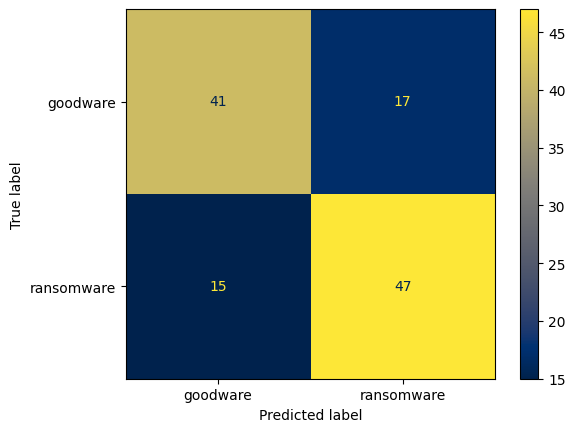

In [ ]:
# KNN com GridSearch
param_gridKNN = {'n_neighbors': [2],'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'weights': ['uniform', 'distance']}
modelKNNgrid = GridSearchCV(KNeighborsClassifier(), param_grid=param_gridKNN, n_jobs=-1, refit=True, cv=5, error_score='raise')
modelKNNgrid.fit(X_train, y_train)
predictKNNgrid = modelKNNgrid.predict(X_test)
print(metrics.classification_report(y_test, predictKNNgrid))
print(modelKNNgrid.best_params_)
cm = metrics.confusion_matrix(y_test, predictKNNgrid)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelKNNgrid.classes_).plot(cmap='cividis')

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

              precision    recall  f1-score   support

    goodware       0.91      0.86      0.88        58
  ransomware       0.88      0.92      0.90        62

    accuracy                           0.89       120
   macro avg       0.89      0.89      0.89       120
weighted avg       0.89      0.89      0.89       120

{'C': 1, 'kernel': 'linear'}
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 12.2 µs


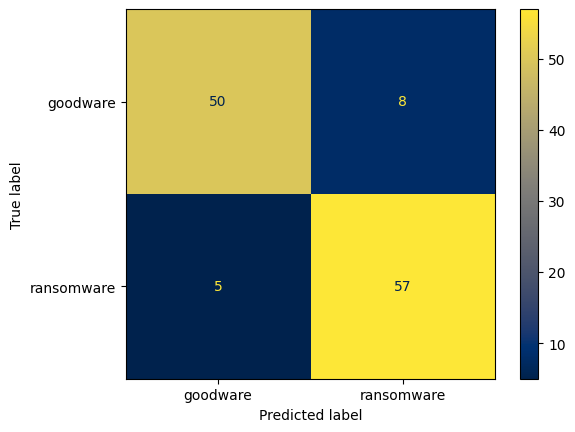

In [ ]:
# SVM com GridSearch
param_gridsvm = {'C': [1,3,5,7,10,20], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
modelsvmgrid = GridSearchCV(svm.SVC(gamma='auto'), param_grid=param_gridsvm, n_jobs=-1, refit=True, cv=5, error_score='raise')
modelsvmgrid.fit(X_train, y_train)
predictsvm = modelsvmgrid.predict(X_test)
print(metrics.classification_report(y_test, predictsvm))
print(modelsvmgrid.best_params_)
cm = metrics.confusion_matrix(y_test, predictsvm)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelsvmgrid.classes_).plot(cmap='cividis')
%time

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import naive_bayes

              precision    recall  f1-score   support

    goodware       0.85      0.79      0.82        58
  ransomware       0.82      0.87      0.84        62

    accuracy                           0.83       120
   macro avg       0.84      0.83      0.83       120
weighted avg       0.83      0.83      0.83       120

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs


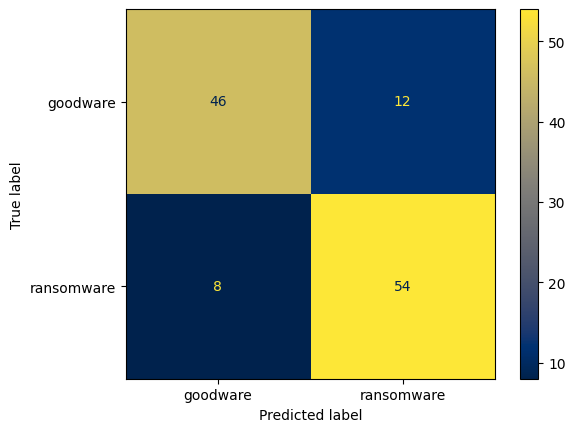

In [ ]:
modelGNB = GaussianNB()
modelGNB.fit(X_train, y_train)
previsaoGNB = modelGNB.predict(X_test)
print(metrics.classification_report(y_test, previsaoGNB))
cm = metrics.confusion_matrix(y_test, previsaoGNB)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelGNB.classes_).plot(cmap='cividis')
%time

In [ ]:
from sklearn import tree

In [ ]:
# Before fitting the model, encode the target variables
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)  # Fit on training data and transform
y_test_encoded = le.transform(y_test)      # Transform test data using the same encoder

In [ ]:
param_gridtree = {'criterion': ['gini', 'entropy'], 'max_depth': [2,4,6,8,9,10,11,12]}
modeltreegrid = GridSearchCV(tree.DecisionTreeClassifier(random_state=84), param_grid=param_gridtree, n_jobs=-1, refit=True, cv=5, error_score='raise')
modeltreegrid.fit(X_train, y_train_encoded)
predicttree = modeltreegrid.predict(X_test)
print(metrics.classification_report(y_test_encoded, predicttree))
print(modeltreegrid.best_params_)
cm = metrics.confusion_matrix(y_test_encoded, predicttree)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.inverse_transform(modeltreegrid).classes_).plot(cmap='cividis')

plt.savefig(WORK_DIR + "tree_confusion_matrix.svg")
%time

              precision    recall  f1-score   support

           0       0.96      0.90      0.93        58
           1       0.91      0.97      0.94        62

    accuracy                           0.93       120
   macro avg       0.94      0.93      0.93       120
weighted avg       0.94      0.93      0.93       120

{'criterion': 'entropy', 'max_depth': 6}


ValueError: y should be a 1d array, got an array of shape () instead.

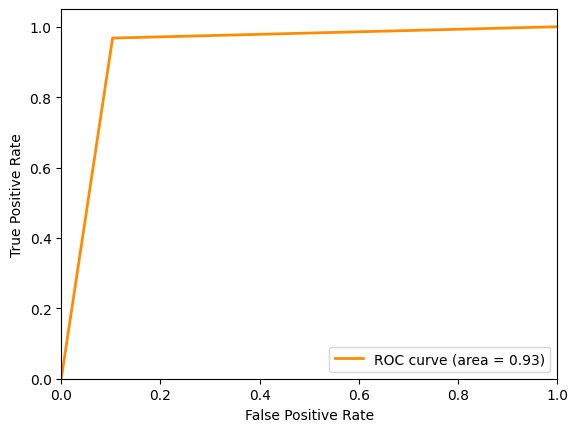

In [ ]:
# prompt: draw roc curve with the classification results above

from sklearn.metrics import roc_curve, auc

# Assuming 'predictsvm' contains the predicted probabilities for the SVM model
# If not, replace with the appropriate variable name

# Calculate the probabilities for the positive class (you might need to adjust this based on your model's output)
y_prob_tree = modeltreegrid.predict_proba(X_test)[:, 1]


# Compute ROC curve and ROC area for each class
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_prob_tree)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
# plt.show()
plt.savefig(WORK_DIR + "tree_roc.svg")


In [ ]:
from sklearn.ensemble import RandomForestClassifier

              precision    recall  f1-score   support

    goodware       0.91      0.88      0.89        58
  ransomware       0.89      0.92      0.90        62

    accuracy                           0.90       120
   macro avg       0.90      0.90      0.90       120
weighted avg       0.90      0.90      0.90       120

{'criterion': 'gini', 'n_estimators': 20}
CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 19.6 µs


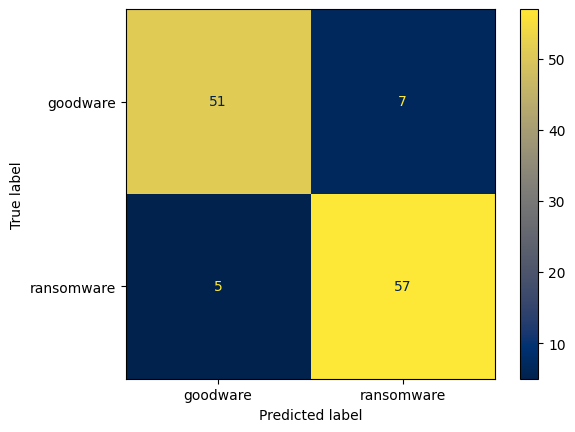

In [ ]:
# RandomForest com GridSearch
param_gridrf = {"n_estimators": [1,3,5,7,10,20,30,50,60,70,80,100], 'criterion':['gini', 'entropy']} # Na primeira tentativa, a busca parou no 80. Para achar o parametro ótimo, fiz novo teste desde 80 até 90

#param_gridrf = {"n_estimators": [80,81,82,83,84,85,86,87], 'criterion':['gini', 'entropy']}

modelrfgrid = GridSearchCV(RandomForestClassifier(), param_gridrf, n_jobs=-1, cv=5, error_score='raise')
modelrfgrid.fit(X_train, y_train)
predictrf = modelrfgrid.predict(X_test)
print(metrics.classification_report(y_test, predictrf))
print(modelrfgrid.best_params_)
cm = metrics.confusion_matrix(y_test, predictrf)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelrfgrid.classes_).plot(cmap='cividis')
%time

In [ ]:
from sklearn.neural_network import MLPClassifier

Iteration 1, loss = 0.67147825
Iteration 2, loss = 0.33140603
Iteration 3, loss = 0.17202822
Iteration 4, loss = 0.09297741
Iteration 5, loss = 0.05020006
Iteration 6, loss = 0.02922234
Iteration 7, loss = 0.01838143
Iteration 8, loss = 0.01168507
Iteration 9, loss = 0.00776976
Iteration 10, loss = 0.00522341
Iteration 11, loss = 0.00351530
Iteration 12, loss = 0.00262681
Iteration 13, loss = 0.00189040
Iteration 14, loss = 0.00145566
Iteration 15, loss = 0.00111305
Iteration 16, loss = 0.00091052
Iteration 17, loss = 0.00073309
Iteration 18, loss = 0.00063487
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.
              precision    recall  f1-score   support

    goodware       0.92      0.78      0.84        58
  ransomware       0.82      0.94      0.87        62

    accuracy                           0.86       120
   macro avg       0.87      0.86      0.86       120
weighted avg       0.87      0.86      0.86       120

CPU times: user 

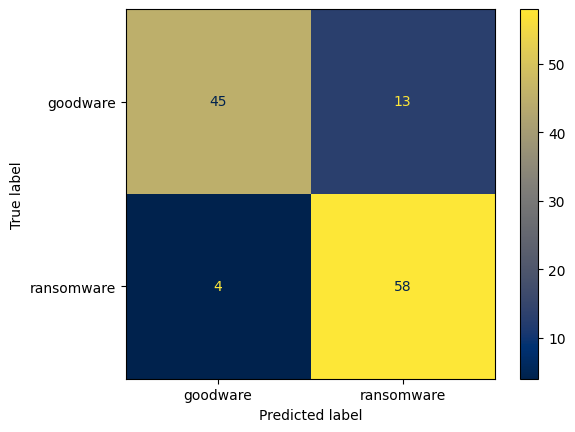

In [ ]:
modelmlp = MLPClassifier(hidden_layer_sizes=(50,50,50), max_iter=50000000, tol=0.01, random_state = 12, verbose = True, activation='relu', solver='adam')
modelmlp.fit(X_train, y_train)
predictmlp = modelmlp.predict(X_test)
print(metrics.classification_report(y_test, predictmlp))
cm = metrics.confusion_matrix(y_test, predictmlp)
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelmlp.classes_).plot(cmap='cividis')
%time

In [ ]:
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


              precision    recall  f1-score   support

    goodware       0.93      0.93      0.93        58
  ransomware       0.94      0.94      0.94        62

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.93       120
weighted avg       0.93      0.93      0.93       120

{'colsample_bytree': 0.8553133338531423, 'gamma': 0.10783415674426916, 'learning_rate': 0.14119135736401167, 'max_depth': 5, 'n_estimators': 141, 'subsample': 0.6628651471762574}
CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 4.05 µs


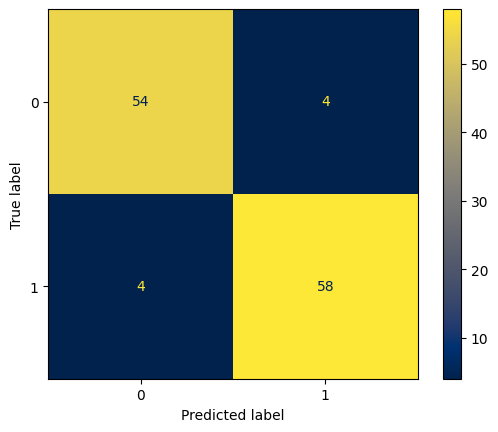

In [ ]:
xgb_model = xgb.XGBClassifier()

# param_gridxgb = {"n_estimators": [100, 110, 120, 130, 140, 150],
#                  "colsample_bytree": [0.3, 0.4, 0.5, 0.6, 0.7],
#                  "gamma": [0, 0.1, 0.2, 0.3, 0.4, 0.5],
#                  "learning_rate": [0.05],
#                  "max_depth": [3, 4, 5, 6, 7, 8],
#                  "subsample": [0.4, 0.5, 0.6],
#                  'objective':['binary:logistic']}

# modelxgbgrid = GridSearchCV(xgb_model, param_gridxgb, cv=5, n_jobs=-1, error_score='raise', scoring = 'roc_auc')

# 1. Encode column names of X_train and X_test
le_columns = LabelEncoder()
X_train_columns_encoded = le_columns.fit_transform(X_train.columns)
X_train.columns = X_train_columns_encoded
X_test.columns = le_columns.transform(X_test.columns) # Apply to X_test as well

# Before fitting the model, encode the target variables
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)  # Fit on training data and transform
y_test_encoded = le.transform(y_test)      # Transform test data using the same encoder

params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, random_state=81, cv=5, verbose=1, n_jobs=-1, error_score='raise')

search.fit(X_train, y_train_encoded)

predictxgb = search.predict(X_test)
print(metrics.classification_report(y_test, le.inverse_transform(predictxgb)))
print(search.best_params_)

cm = metrics.confusion_matrix(y_test, le.inverse_transform(predictxgb))
metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=search.classes_).plot(cmap='cividis')

%time

CPU times: user 21 µs, sys: 1e+03 ns, total: 22 µs
Wall time: 13.8 µs


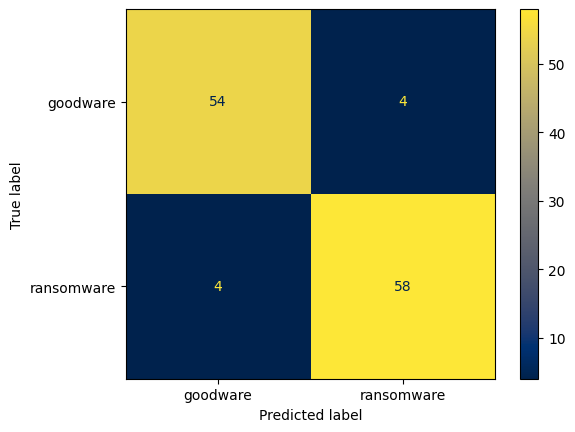

In [ ]:
cm = metrics.confusion_matrix(y_test, le.inverse_transform(predictxgb))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_).plot(cmap='cividis')

# disp.plot(cmap='cividis')
plt.savefig(WORK_DIR + "xgb_confusion_matrix.svg")
%time

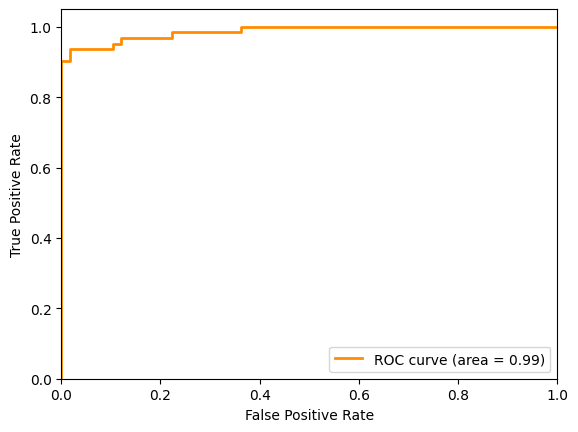

In [ ]:
# prompt: draw roc curve with the classification results above

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming 'predictxgb' and 'y_test' are defined from the previous code
# and 'predictxgb' contains probabilities for the positive class

# Get predicted probabilities for the positive class
y_prob = search.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test_encoded, y_prob)  # Use encoded y_test
roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for a specific class
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
# plt.show()
plt.savefig(WORK_DIR + "xgb_roc.svg")
